In [21]:
import time
import healpy as hp
import numpy as np
from astropy.io import fits
from healpy.fitsfunc import read_map

In [29]:
HDU = 1
filepath = 'data/HFI_SkyMap_143_2048_R3.01_halfmission-1.fits'

# read the fits file with healpy and fits
hdul = fits.open(filepath)
skyhm1_fits = hdul[HDU].data.field(0).ravel()

#skyhm1_hp = read_map(filepath, field=0, hdu=HDU)

In [31]:
print(len(skyhm1_fits))
print(len(skyhm1_hp))

50331648
50331648


In [19]:
hdul[HDU].data[-1]

(0.0041627483, 4.5672972e-05, -6.143326e-05, 1019, 6.0392114e-10, 1.503029e-10, 1.8863553e-11, 2.4639613e-09, 5.2679548e-11, 2.6426927e-09)

In [22]:
np.where(skyhm1_fits == -1.1961287e-04)

(array([4194303]),)

In [23]:
np.where(skyhm1_fits == -7.2607654e-05)

(array([8388607]),)

In [25]:
np.where(skyhm1_fits == -9.1664100e-05)

(array([12582911]),)

In [43]:
gal_cover  = 60

gp_file = 'data/HFI_Mask_GalPlane-apo5_2048_R2.00.fits'
hdul_gp = fits.open(gp_file)

gp_060_fits = hdul_gp[1].data[f'GAL0{gal_cover}']
hi = hdul_gp[1].data.field(GALCOVER_DICT[f'GAL0{gal_cover}'])

print(gp_060_fits == hi)


[ True  True  True ...  True  True  True]


In [46]:
a = gp_060_fits == gp_060_hp
np.where(a == False)

(array([       0,        1,        2, ..., 50331645, 50331646, 50331647]),)

In [45]:
GALCOVER_DICT = {
    'GAL020': 0,
    'GAL040': 1,
    'GAL060': 2,
    'GAL070': 3,
    'GAL080': 4,
    'GAL090': 5,
    'GAL097': 6,
    'GAL099': 7
}

gp_060_hp = read_map(gp_file, field=GALCOVER_DICT[f'GAL0{gal_cover}'], hdu=HDU)

In [47]:
print(gp_060_hp)

[1.         1.         1.         ... 0.99999994 0.99999994 0.99999994]


0.0 180.0 -180.0 180.0


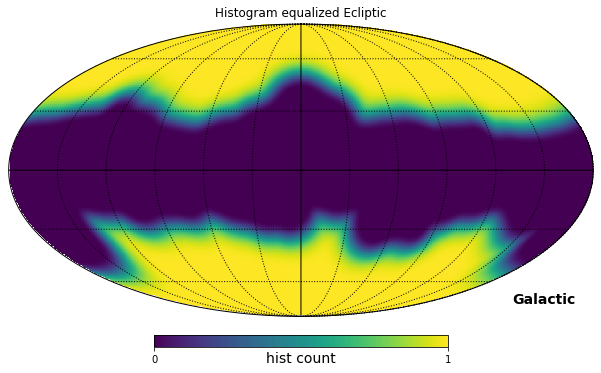

In [48]:
hp.mollview(gp_060_hp, coord=["G"],# norm="hist",
            title="Histogram equalized Ecliptic", unit="hist count")
hp.graticule()